In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

plt.style.use('Physical Review.mplstyle')

In [2]:
df = pd.read_excel('beta_good2_gauss3.xlsx', sheet_name=None)

for k, d in df.items():
    print(f'sheet: {k}')
    display(d)

sheet: data


,phase,n,he_asym,he_beta1,he_beta2,he_beta3,he_beta4,he_beta5,he_beta6,he_beta7,...,he_beta3_err,he_beta4_err,ne_beta1_opt,ne_beta2_opt,ne_beta3_opt,ne_beta4_opt,ne_beta1_err,ne_beta2_err,ne_beta3_err,ne_beta4_err
0,0.10,15298,0.078403,0.222724,0.844345,0.287682,0.891408,-0.028547,0.007414,0.004370,...,0.048957,0.059213,0.189671,-0.130423,0.045842,0.059112,0.012746,0.016686,0.017351,0.019831
1,0.25,13168,0.004507,-0.056960,0.866513,-0.241413,0.920531,-0.033971,0.019604,0.000751,...,0.044743,0.055263,0.052578,-0.123109,-0.084627,0.072571,0.015801,0.020836,0.021684,0.024773
2,0.40,13188,-0.085452,-0.341638,0.896915,-0.664745,0.941443,0.003775,0.080184,0.005368,...,0.036169,0.043728,-0.184453,-0.102889,-0.056452,0.030038,0.017652,0.023099,0.024043,0.027469
3,0.55,13153,-0.142383,-0.413377,0.900759,-0.514874,0.936086,-0.038593,0.050637,0.009506,...,0.047321,0.057254,-0.315786,-0.113829,0.084076,-0.001722,0.016882,0.021782,0.022676,0.025893
4,0.70,6539,-0.082198,-0.197470,0.833840,-0.079482,0.891466,0.007302,0.007400,0.015541,...,0.056101,0.069441,-0.249155,-0.119931,0.234009,0.038291,0.014830,0.019296,0.020199,0.022937
5,0.85,12915,0.006318,0.093984,0.888851,0.375520,0.906164,0.032018,0.050227,-0.014344,...,0.047087,0.056855,-0.026161,-0.114717,0.292944,0.047273,0.016966,0.022376,0.023512,0.026603
6,1.00,13179,0.080203,0.272525,0.843148,0.498616,0.875916,-0.007291,0.046222,-0.075164,...,0.060498,0.071913,0.147423,-0.125168,0.183351,0.072216,0.014184,0.018625,0.019444,0.022143
7,1.15,13120,0.071242,0.176085,0.886267,0.147231,1.010050,-0.020296,0.029844,-0.015858,...,0.059477,0.073780,0.179677,-0.138552,0.001118,0.045455,0.013033,0.017081,0.017752,0.020292
8,1.30,13170,-0.030785,-0.161376,0.825901,-0.383518,0.977820,-0.017945,0.030408,0.006574,...,0.039512,0.049068,-0.044766,-0.150440,-0.106467,0.032026,0.013629,0.017991,0.018716,0.021362
9,1.45,13156,-0.122986,-0.395154,0.809057,-0.603712,0.955974,-0.024622,0.119796,-0.032998,...,0.041252,0.050358,-0.252950,-0.166755,-0.004575,-0.005532,0.021493,0.028002,0.029070,0.033223


sheet: fitted


,he_beta1_amp_err,he_beta1_amp_value,he_beta1_freq_err,he_beta1_freq_value,he_beta1_offset_err,he_beta1_offset_value,he_beta1_shift_err,he_beta1_shift_value,he_beta1m3_amp_err,he_beta1m3_amp_value,...,ne_beta3_amp_err,ne_beta3_amp_value,ne_beta3_freq_err,ne_beta3_freq_value,ne_beta3_offset_err,ne_beta3_offset_value,ne_beta3_shift_err,ne_beta3_shift_value,ne_beta4_c_err,ne_beta4_c_value
0,0.005097,0.347818,0,6.283185,0.003756,-0.072793,0.015513,0.075804,0.008122,0.141339,...,0.006811,0.197069,0,6.283185,0.004613,-0.012368,0.030744,-1.14502,0.003214,-0.030674


In [3]:
def err_operadd(a, b):
    return (a**2 + b**2) ** 0.5


df['data']['he_beta1m3_opt'] = df['data']['he_beta1_opt'] - 2/3 * df['data']['he_beta3_opt']
df['data']['he_beta1m3_err'] = err_operadd(df['data']['he_beta1_err'], 2/3 * df['data']['he_beta3_err'])
df['data']['ne_beta1m3_opt'] = df['data']['ne_beta1_opt'] - 3/2 * df['data']['ne_beta3_opt']
df['data']['ne_beta1m3_err'] = err_operadd(df['data']['ne_beta1_err'], 3/2 * df['data']['ne_beta3_err'])

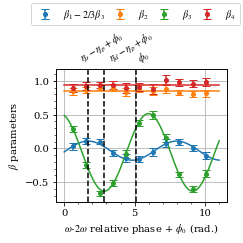

In [4]:
th = np.linspace(0, 11, 111)
props = iter(plt.rcParams['axes.prop_cycle'])
phi0 = 5.101
d = df['data']
f = dict(df['fitted'].iloc[0])

plt.figure(figsize=(3.4, 3.4))
plt.xlabel(r'$\omega$-$2\omega$ relative phase + $\phi_0$ (rad.)')
plt.ylabel(r'$\beta$ parameters')

for key, label in [['he_beta1m3', r'$\beta_1 - 2/3 \beta_3$'],
                   ['he_beta2', r'$\beta_2$'],
                   ['he_beta3', r'$\beta_3$'],
                   ['he_beta4', r'$\beta_4$']]:
    prop = next(props)
    plt.errorbar(2*np.pi*d['phase'], d[key], yerr=d[f'{key}_err'],
                 fmt='o', label=label, **prop)
    if key in {'he_beta1m3', 'he_beta3'}:
        plt.plot(th, (f[f'{key}_amp_value']
                      * np.cos(th-f[f'{key}_shift_value'])
                      + f[f'{key}_offset_value']),
                 **prop)
    elif key in {'he_beta2', 'he_beta4'}:
        plt.plot(th, 0*th + f[f'{key}_c_value'],
                 **prop)

xlim = plt.xlim()
plt.locator_params(axis='x', steps=[1, 5, 10])
plt.locator_params(axis='y', steps=[1, 5, 10])
plt.grid(True)

plt.twiny()
plt.xlim(*xlim)
prop = {'color': 'k', 'linestyle': '--'}
vlines = [
    {'at': f[f'he_beta1m3_shift_value']%(2*np.pi),
     'rough': 1,
     'label': r'$\eta_s-\eta_p+\phi_0$'},
    {'at': f[f'he_beta3_shift_value']%(2*np.pi) - np.pi,
     'rough': 3,
     'label': r'$\eta_d-\eta_p+\phi_0$'},
    {'at': phi0, 'rough': 5, 'label': r'$\phi_0$'},
]

for v in vlines:
    plt.axvline(v['at'], **prop)

plt.xticks([v['rough'] for v in vlines], [v['label'] for v in vlines],
           rotation=30, ha='left')
plt.tick_params(axis='x', which='both', length=0)

plt.figlegend(loc='upper right', ncol=4, columnspacing=0.5, bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.subplots_adjust(top=0.725)
plt.savefig('fig_he_beta_good2_gauss3.pdf')
plt.show()